
<h1 style='background:brown; border:0; color:white'><center>COVID-19 </center><h1>
    
  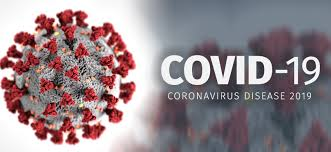
    
**Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome     coronavirus 2 (SARS-CoV-2). It was first identified in December 2019 in Wuhan, Hubei, China, and has resulted in an ongoing pandemic. As of 25 September 2020, more than 32.2 million cases have been reported across 188 countries and territories with more than 983,000 deaths; more than 22.2 million people have recovered.**



<h2 style='background:black; border:0; color:white'><center>CONTENTS</center><h2>

*  **CHOROPLETH MAPS**

 * Choropleth Map of World
 * Choropleth Map of Asia
 * Choropleth Map of Europe
 

* **LINE CHARTS**

 * Line Chart - Infection Rate of India
 * Line Chart - Death Rate of India
 * Line Chart - Recovery Rate of India
 

* **SCATTER PLOTS**

 * Scatter Plot - Confirmed v Active Case of India
 * Scatter Plot - Deaths v Recovered of India
 

* **PIE CHARTS**

 * Percentage of Total Deaths in 20 Most Affected Countries
 * Percentage of Total Recovered in 20 Most Affected Countries
 

* **BAR CHARTS**

 * Comparison of Total Tests in 10 Most Affected Countries
 * Comparison of Deaths/Million in 10 Most Affected Countries
 

* **BUBBLE CHART**

 * Bubble Plot for Total Cases v Total Deaths
 

* **SUNBURST CHART**

 * Sunburst Chart for Active Cases
 

* **3D PLOT**

 * 3D Plot for Total Case, Total Deaths and Total Recovered



In [ ]:
import pandas as pd # load the datasets
import numpy as np # mathamtical computation
import matplotlib.pyplot as plt #visualisation
import plotly ##visualisation
import plotly.express as px #visualisation
import plotly.graph_objects as go #visualisation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/covid19/full_grouped.csv')
data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [ ]:
worldometer = pd.read_csv('/content/drive/MyDrive/covid19/worldometer_data.csv')
worldometer.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
# We will use this data in Choropleth Map
latest_data = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')
latest_data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [ ]:
# Making Another Dataframe for India
# We will use this in Line Plot and Scatter Plot

data_INDIA = data[data['Country/Region']=='India']
data_INDIA.head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
79,2020-01-22,India,0,0,0,0,0,0,0,South-East Asia
266,2020-01-23,India,0,0,0,0,0,0,0,South-East Asia
453,2020-01-24,India,0,0,0,0,0,0,0,South-East Asia
640,2020-01-25,India,0,0,0,0,0,0,0,South-East Asia
827,2020-01-26,India,0,0,0,0,0,0,0,South-East Asia


In [ ]:
#Data Table
worldometer_new=worldometer.drop(['NewCases','NewDeaths','NewRecovered'],axis=1)
worldometer_new = worldometer_new[worldometer_new['TotalCases'] > 10000]
worldometer_new = worldometer_new.groupby('Country/Region').sum()
worldometer_new.style.background_gradient(cmap='RdPu')

<ipython-input-13-7fd645831e24>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  worldometer_new = worldometer_new.groupby('Country/Region').sum()


,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
Country/Region,,,,,,,,,,
Afghanistan,39009447.000000,36896,1298.000000,25840.000000,9758.000000,31.000000,946.000000,33.000000,90396.000000,2317.000000
Algeria,43926079.000000,33626,1273.000000,23238.000000,9115.000000,57.000000,766.000000,29.000000,0.000000,0.000000
Argentina,45236884.000000,228195,4251.000000,99852.000000,124092.000000,1150.000000,5044.000000,94.000000,794544.000000,17564.000000
Armenia,2963811.000000,39819,772.000000,31556.000000,7491.000000,0.000000,13435.000000,260.000000,171600.000000,57898.000000
Australia,25528864.000000,19890,255.000000,10941.000000,8694.000000,52.000000,779.000000,10.000000,4631419.000000,181419.000000
Austria,9011577.000000,21696,719.000000,19596.000000,1381.000000,25.000000,2408.000000,80.000000,937275.000000,104008.000000
Azerbaijan,10148243.000000,33247,479.000000,29275.000000,3493.000000,66.000000,3276.000000,47.000000,766179.000000,75499.000000
Bahrain,1706669.000000,42889,156.000000,39945.000000,2788.000000,41.000000,25130.000000,91.000000,876700.000000,513691.000000
Bangladesh,164851401.000000,249651,3306.000000,143824.000000,102521.000000,0.000000,1514.000000,20.000000,1225124.000000,7432.000000


INTRO TO PLOTLY

The Plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases. Now, We are going to analyse and find insights with this interactive Visualization Library
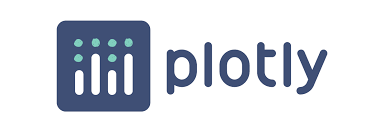

CHOROPLETH MAP

A Choropleth Map is a map composed of colored polygons. It is used to represent spatial variations of a quantity. 

Below we show how to create Choropleth Maps using the Plotly Express 'px.choropleth'

In [ ]:
# Choropleth Map of the World
fig = px.choropleth(latest_data,locations='Country',locationmode='country names',color='Confirmed',animation_frame='Date')
fig.update_layout(title='Choropleth Map of Confirmed Cases - World on 13-10-2020',template="plotly_dark")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Continent Map using Choropleth
fig = px.choropleth(latest_data,locations='Country',locationmode='country names',color='Confirmed',animation_frame='Date',scope='asia')
fig.update_layout(title='Choropleth Map of Confirmed Cases - Asia on 13-10-2020',template="plotly_dark")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Continent Map using Choropleth
fig = px.choropleth(latest_data,locations='Country',locationmode='country names',color='Confirmed',animation_frame='Date',scope='europe')
fig.update_layout(title='Choropleth Map of Confirmed Cases - Europe on 13-10-2020',template="plotly_dark")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

LINE PLOTS AND SCATTER PLOTS

With 'px.line', each data point is represented as a vertex 
(which location is given by the x and y columns) of a polyline mark in 2D space.
For Line Charts, We will see the trend of Infection Rate, Death Rate and Recovery Rate 
of India with respect to the Phases of the Nationwide lockdown.

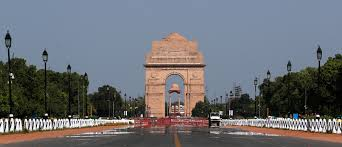

<h2 style='background:black; border:0; color:white'><center>NATIONWIDE LOCKDOWN</center><h2>

Phase 1: 25 March 2020 – 14 April 2020 (21 days)

Phase 2: 15 April 2020 – 3 May 2020 (19 days)

Phase 3: 4 May 2020 – 17 May 2020 (14 days)

Phase 4: 18 May 2020 – 31 May 2020 (14 days)

In [ ]:
India_lockdown_1 = '2020-03-25'
India_lockdown_2 = '2020-04-15'
India_lockdown_3 = '2020-05-04'
India_lockdown_4 = '2020-05-18'

In [ ]:
fig = px.line(data_INDIA,x='Date',y = 'New cases',title='Lockdown Phases - Infection Rate')
fig.add_shape(dict(type='line',
                   x0=India_lockdown_1,
                   y0=0,
                   x1=India_lockdown_1,
                   y1=data_INDIA['New cases'].max(),
                   line = dict(color='red',dash="dash")
                   ))
fig.add_annotation(dict(
                   x = India_lockdown_1,
                   y = data_INDIA['New cases'].max(),
                   text = 'Phase 1')
)
fig.add_shape(dict(type='line',
                   x0=India_lockdown_2,
                   y0=0,
                   x1=India_lockdown_2,
                   y1=data_INDIA['New cases'].max(),
                   line = dict(color='blue',dash="dot")
                   ))
fig.add_annotation(dict(
                   x = India_lockdown_2,
                   y = data_INDIA['New cases'].max(),
                   text = 'Phase 2')
)
fig.add_shape(dict(type='line',
                   x0=India_lockdown_3,
                   y0=0,
                   x1=India_lockdown_3,
                   y1=data_INDIA['New cases'].max(),
                   line = dict(color='yellow',dash="dashdot")
                   ))
fig.add_annotation(dict(
                   x = India_lockdown_3,
                   y = data_INDIA['New cases'].max(),
                   text = 'Phase 3')
)
fig.add_shape(dict(type='line',
                   x0=India_lockdown_4,
                   y0=0,
                   x1=India_lockdown_4,
                   y1=data_INDIA['New cases'].max(),
                   line = dict(color='green',dash="longdash")
                   ))
fig.add_annotation(dict(
                   x = India_lockdown_4,
                   y = data_INDIA['New cases'].max(),
                   text = 'Phase 4')
)

In [ ]:
fig = px.line(data_INDIA,x='Date',y = 'New deaths',title='Lockdown Phases - Death Rate')
fig.add_shape(dict(type='line',
                   x0=India_lockdown_1,
                   y0=0,
                   x1=India_lockdown_1,
                   y1=data_INDIA['New deaths'].max(),
                   line = dict(color='red',dash="dashdot")
                   ))
fig.add_annotation(dict(
                   x = India_lockdown_1,
                   y = data_INDIA['New deaths'].max(),
                   text = 'Phase 1')
)
fig.add_shape(dict(type='line',
                   x0=India_lockdown_2,
                   y0=0,
                   x1=India_lockdown_2,
                   y1=data_INDIA['New deaths'].max(),
                   line = dict(color='blue',dash="dashdot")
                   ))
fig.add_annotation(dict(
                   x = India_lockdown_2,
                   y = data_INDIA['New deaths'].max(),
                   text = 'Phase 2')
)
fig.add_shape(dict(type='line',
                   x0=India_lockdown_3,
                   y0=0,
                   x1=India_lockdown_3,
                   y1=data_INDIA['New deaths'].max(),
                   line = dict(color='yellow',dash="dashdot")
                   ))
fig.add_annotation(dict(
                   x = India_lockdown_3,
                   y = data_INDIA['New deaths'].max(),
                   text = 'Phase 3')
)
fig.add_shape(dict(type='line',
                   x0=India_lockdown_4,
                   y0=0,
                   x1=India_lockdown_4,
                   y1=data_INDIA['New deaths'].max(),
                   line = dict(color='green',dash="dashdot")
                   ))
fig.add_annotation(dict(
                   x = India_lockdown_4,
                   y = data_INDIA['New deaths'].max(),
                   text = 'Phase 4')
)


Are you looking at that Highest Jump in Deaths

Here is the info about it.

Source - The Times of India

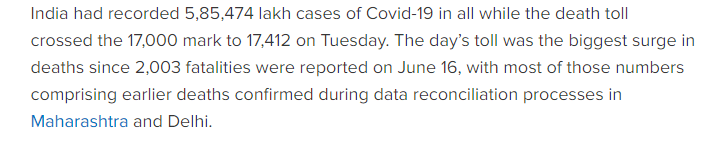


In [ ]:
fig = px.line(data_INDIA,x='Date',y = 'New recovered',title='Lockdown Phases - Recovery Rate')
fig.add_shape(dict(type='line',
                   x0=India_lockdown_1,
                   y0=0,
                   x1=India_lockdown_1,
                   y1=data_INDIA['New recovered'].max(),
                   line = dict(color='red',dash="dashdot")
                   ))
fig.add_annotation(dict(
                   x = India_lockdown_1,
                   y = data_INDIA['New recovered'].max(),
                   text = 'Phase 1')
)
fig.add_shape(dict(type='line',
                   x0=India_lockdown_2,
                   y0=0,
                   x1=India_lockdown_2,
                   y1=data_INDIA['New recovered'].max(),
                   line = dict(color='blue',dash="dashdot")
                   ))
fig.add_annotation(dict(
                   x = India_lockdown_2,
                   y = data_INDIA['New recovered'].max(),
                   text = 'Phase 2')
)
fig.add_shape(dict(type='line',
                   x0=India_lockdown_3,
                   y0=0,
                   x1=India_lockdown_3,
                   y1=data_INDIA['New recovered'].max(),
                   line = dict(color='yellow',dash="dashdot")
                   ))
fig.add_annotation(dict(
                   x = India_lockdown_3,
                   y = data_INDIA['New recovered'].max(),
                   text = 'Phase 3')
)
fig.add_shape(dict(type='line',
                   x0=India_lockdown_4,
                   y0=0,
                   x1=India_lockdown_4,
                   y1=data_INDIA['New recovered'].max(),
                   line = dict(color='green',dash="dashdot")
                   ))
fig.add_annotation(dict(
                   x = India_lockdown_4,
                   y = data_INDIA['New recovered'].max(),
                   text = 'Phase 4')
)


Now let's draw Scatter Plot

With 'px.scatter', each data point is represented as a marker point, whose location is given by the x and y columns.

If Plotly Express does not provide a good starting point, it is possible to use the more generic go.Scatter class from plotly.graph_objects. Whereas plotly.express has two functions scatter and line, go.Scatter can be used both for plotting points (makers) or lines, depending on the value of mode.

Here , let's find the relationship between Confirmed v Active Cases and Deaths v Recovered of India.

In [ ]:
# Scatter Plot in Plotly
fig = go.Figure(data=go.Scatter(x=data_INDIA['Confirmed'],y=data_INDIA['Active'],mode='markers',marker=dict(size=10,color=data_INDIA['New cases'],showscale=True),text=data_INDIA['Country/Region']))
fig.update_layout(title='Scatter Plot for Confirmed v Active Cases',xaxis_title='Confirmed',yaxis_title='Active')

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=data_INDIA['Confirmed'],
        y=data_INDIA['Active'],
        mode='markers',
        marker_size=10,
        marker_color=data_INDIA['New cases'],
        marker_colorscale='Viridis',
        text=data_INDIA['Country/Region']
    )
)

fig.update_layout(
    title='Scatter Plot for Confirmed vs Active Cases',
    xaxis_title='Confirmed',
    yaxis_title='Active'
)

fig.show()


In [ ]:
# Scatter Plot in Plotly
fig = go.Figure(data=go.Scatter(x=data_INDIA['Deaths'],y=data_INDIA['Recovered'],mode='markers',marker=dict(size=10,color=data_INDIA['New cases'],showscale=True),text=data_INDIA['Country/Region']))
fig.update_layout(title='Scatter Plot for Deaths v Recovery',xaxis_title='Deaths',yaxis_title='Recovery')

fig.show()

For rest other plots let's use another dataset given i.e of Worldometers

PIE CHARTS

A pie chart is a circular statistical chart, which is divided into sectors to illustrate numerical proportion.
In 'px.pie', data visualized by the sectors of the pie is set in values. The sector labels are set in names.

In [ ]:
# Pie Chart in PLotly
fig = px.pie(worldometer.head(20),values='TotalDeaths',names='Country/Region',title='Percentage of Total Deaths in 20 Most Affected Countries')
fig.show()

We can also add the names to the Pie Chart inside it by using fig.update_traces as shown below.

In [ ]:
# Using Text in Pie Chart
fig = px.pie(worldometer.head(20),values='TotalRecovered',names='Country/Region',title='Percentage of Total Recovered in 20 Most Affected Countries')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

BAR CHARTS

With 'px.bar', each row of the DataFrame is represented as a rectangular mark.

For Bar Charts we will be comparing the Total Tests and Deaths/Million of Top 10 Affected Countries.

In [ ]:
# Bar Charts
fig = px.bar(worldometer.head(10), y='TotalTests',x='Country/Region',color='WHO Region',height=400)
fig.update_layout(title='Comparison of Total Tests of 10 Most Affected Countries',xaxis_title='Country',yaxis_title='Total Tests',template="plotly_dark")
fig.show()

In [ ]:
# Bar Charts
fig = px.bar(worldometer.head(10), y='Deaths/1M pop',x='Country/Region',color='WHO Region',height=400)
fig.update_layout(title='Comparison of Deaths/Million of 10 Most Affected Countries',xaxis_title='Country',yaxis_title='Deaths/Million',template="plotly_dark")
fig.show()

In [ ]:
# Bar Charts
fig = px.bar(worldometer.head(10), y='Tests/1M pop',x='Country/Region',color='WHO Region',height=400)
fig.update_layout(title='Comparison of Tests/Million of 10 Most Affected Countries',xaxis_title='Country',yaxis_title='Tests/Million',template="plotly_dark")
fig.show()

BUBBLE CHART

A bubble chart is a scatter plot in which a third dimension of the data is shown through the size of markers. 
For other types of scatter plot, see the line and scatter page.

In [ ]:
# Bubble Chart using Plotly
fig = px.scatter(worldometer.head(50), x="TotalCases", y="TotalDeaths",size='Population',
	               color="Continent",
                 hover_name="Country/Region", log_x=True, size_max=60)
fig.update_layout(title='Bubble Plot for Total Cases v Total Deaths of 50 Most Affected Countries',xaxis_title='Cases',yaxis_title='Deaths')
fig.show()

SUNBURST CHART

Sunburst plots visualize hierarchical data spanning outwards radially from root to leaves.

The sunburst sector hierarchy is determined by the entries in labels (names in px.sunburst) and in parents.

The root starts from the center and children are added to the outer rings.

Let's Analyse Active Cases of Top 50 Countries here.

In [ ]:
# Sunburst Chart using Plotly
fig = px.sunburst(worldometer.head(50),path=['Continent','Country/Region','WHO Region'],values='Population',
                  color='ActiveCases',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(worldometer.head(50)['Serious,Critical'], weights=worldometer.head(50)['Population']))
fig.update_layout(title='Sunburst Chart')
fig.show()

3D-PLOT

Like the 2D scatter plot 'px.scatter', the 3D function 'px.scatter_3d' plots individual data in three-
dimensional space.

Here Let's do it on Total Cases, Total Deaths and Total Recovered of 20 Most Affected Countries.

Don't forget to move the 3D Plot.

In [ ]:
# 3D Plots
fig = px.scatter_3d(worldometer.head(20), x='TotalCases', y='TotalDeaths', z='TotalRecovered',
              color='Country/Region')
fig.update_layout(title='3D Plot of Total Cases, Total Deaths and Total Recovered of Top 20 Affected Countries')
fig.show()

In [ ]:
from wordcloud import WordCloud

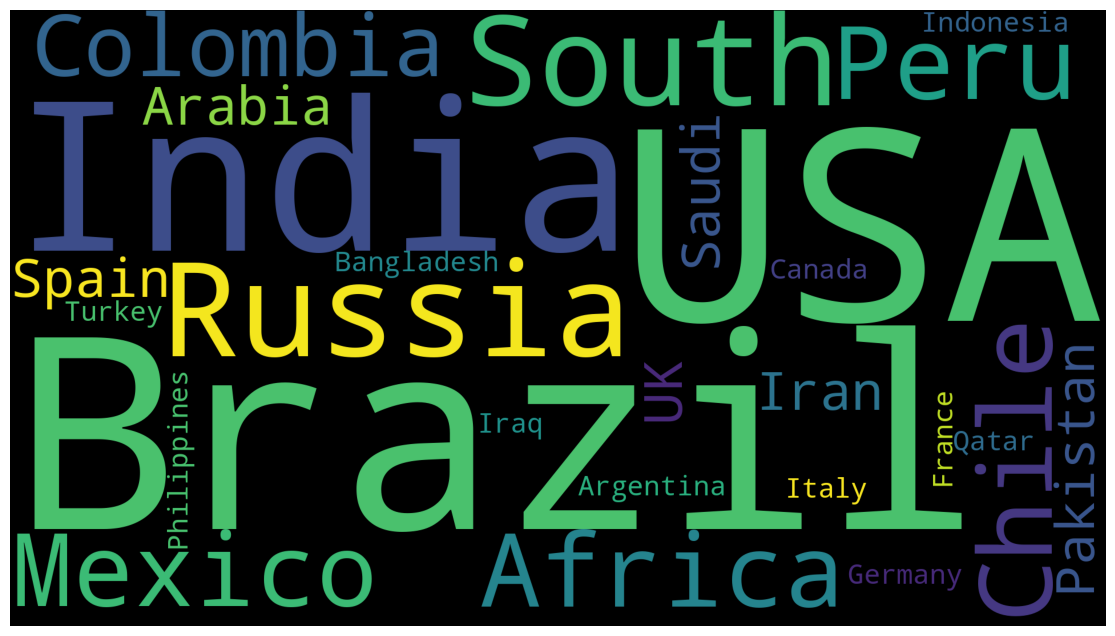

In [ ]:
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='black',width=1920,height=1080).generate(" ".join(worldometer.head(25)['Country/Region']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

In [ ]:
THANK YOU